In [25]:
# Importing Libraries
import sqlite3
import pandas as pd

#Load CSV File
df = pd.read_csv('Mall_Customers.csv') 

# Clean Data Using Pandas
df.dropna()
df.drop_duplicates()
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}) # Identifying gender by 0s and 1s
df['Gender'] = df['Gender'].astype(int) # Changed gender data type to int
print(df)


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       0   19                  15                      39
1             2       0   21                  15                      81
2             3       1   20                  16                       6
3             4       1   23                  16                      77
4             5       1   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       1   35                 120                      79
196         197       1   45                 126                      28
197         198       0   32                 126                      74
198         199       0   32                 137                      18
199         200       0   30                 137                      83

[200 rows x 5 columns]


In [ ]:
# Connect to SQLite
connection = sqlite3.connect('customer_data.db') 

# Writes the df to a new SQL database where the data will be stored(table: 'Customers_Data')
df.to_sql('Customers_Data', connection, if_exists = 'replace', index=False) 

# SQL QUERIES

# Total No. of Customers
query_1 = pd.read_sql_query("SELECT COUNT(*) AS Total_Customers FROM Customers_Data", connection) 
print(query_1)
print()

# Averages of Age, Annual Income, Spending Score
query_2 = pd.read_sql_query("SELECT AVG(Age) as Avg_Age , AVG([Annual Income (k$)]) as Avg_Income, AVG([Spending Score (1-100)]) as Avg_Score FROM Customers_Data", connection) 
print(query_2)
print()

# Average Income and Spending Score by Gender(0: Man, 1: Woman)
query_3 = pd.read_sql_query("SELECT Gender, AVG([Annual Income (k$)]) as Avg_Income, AVG([Spending Score (1-100)]) as Avg_Spending FROM Customers_Data GROUP BY Gender", connection) 
print(query_3)
print()

# Count customers in age brackets
query_4 = pd.read_sql_query("SELECT CASE WHEN Age BETWEEN 18 AND 30 THEN 'Youth' WHEN Age BETWEEN 30 AND 45 THEN 'Middle-Aged' WHEN Age > 45 THEN 'Senior' ELSE 'Other' END AS Age_Group, Count(*) AS Total FROM Customers_Data Group By Age_Group", connection) 
print(query_4)
print()

# Count customers in income brackets
query_5 = pd.read_sql_query("SELECT CASE WHEN [Annual Income (k$)] BETWEEN 18 AND 40 THEN 'Low Income' WHEN [Annual Income (k$)] BETWEEN 40 AND 65 THEN 'Medium Income' ELSE 'High Income' END AS Income_Group, Count(*) AS Total FROM Customers_Data GROUP By Income_Group ", connection) 
print(query_5)
print()

# Count customers in spending score brackets
query_6 = pd.read_sql_query("SELECT CASE WHEN [Spending Score (1-100)] BETWEEN 0 AND 40 THEN 'Low Spending' WHEN [Spending Score (1-100)] BETWEEN 40 AND 65 THEN 'Medium Spending' ELSE 'High Spending' END AS Spending_Group, Count(*) AS TOTAL FROM Customers_Data Group By Spending_Group", connection) 
print(query_6)



   Total_Customers
0              200

   Avg_Age  Avg_Income  Avg_Score
0    38.85       60.56       50.2

   Gender  Avg_Income  Avg_Spending
0       0   62.227273     48.511364
1       1   59.250000     51.526786

     Age_Group  Total
0  Middle-Aged     72
1       Senior     66
2        Youth     62

    Income_Group  Total
0    High Income     88
1     Low Income     44
2  Medium Income     68

    Spending_Group  TOTAL
0    High Spending     58
1     Low Spending     63
2  Medium Spending     79


In [121]:
#Rule Based Segmentation

# Load SQL Data into Pandas
df = pd.read_sql("SELECT * FROM Customers_Data",connection)

# Age Group
def age_group(age):
    if 18 <= age <= 30:
        return 'Youth'
    elif 31 <= age <= 45:
        return 'Middle-Aged'
    elif age > 45:
        return 'Senior'
    else:
        return 'Other'

df["Age Group"] = df["Age"].apply(age_group)

# Income Group
def income_group(income):
    if 18 <= income <= 40:
        return 'Low-Income'
    elif 40 <= income <= 65:
        return 'Medium-Income'
    else:
        return 'High-Income'

df["Income Group"] = df["Annual Income (k$)"].apply(income_group)

# Spending Group
def spending_group(spending):
    if 0 <= spending <= 40:
        return 'Low Spending'
    elif 40 <= spending <= 65:
        return 'Medium Spending'
    else:
        return 'High Spending'

df["Spending Group"] = df["Spending Score (1-100)"].apply(spending_group)

df['Segment Analysis'] = df["Age Group"] + " " + '|' + " " + df["Income Group"] + " " + '|'+ " " + df["Spending Group"]

df.head(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Income Group,Spending Group,Segment Analysis
0,1,0,19,15,39,Youth,High-Income,Low Spending,Youth | High-Income | Low Spending
1,2,0,21,15,81,Youth,High-Income,High Spending,Youth | High-Income | High Spending
2,3,1,20,16,6,Youth,High-Income,Low Spending,Youth | High-Income | Low Spending
3,4,1,23,16,77,Youth,High-Income,High Spending,Youth | High-Income | High Spending
4,5,1,31,17,40,Middle-Aged,High-Income,Low Spending,Middle-Aged | High-Income | Low Spending
5,6,1,22,17,76,Youth,High-Income,High Spending,Youth | High-Income | High Spending
6,7,1,35,18,6,Middle-Aged,Low-Income,Low Spending,Middle-Aged | Low-Income | Low Spending
7,8,1,23,18,94,Youth,Low-Income,High Spending,Youth | Low-Income | High Spending
8,9,0,64,19,3,Senior,Low-Income,Low Spending,Senior | Low-Income | Low Spending
9,10,1,30,19,72,Youth,Low-Income,High Spending,Youth | Low-Income | High Spending


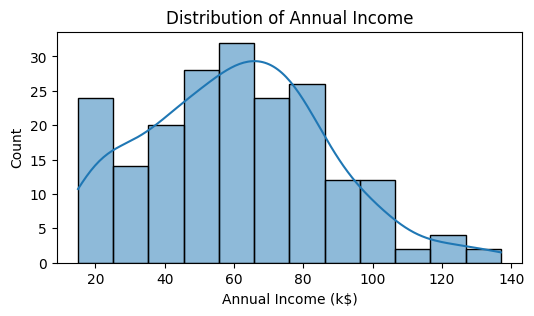

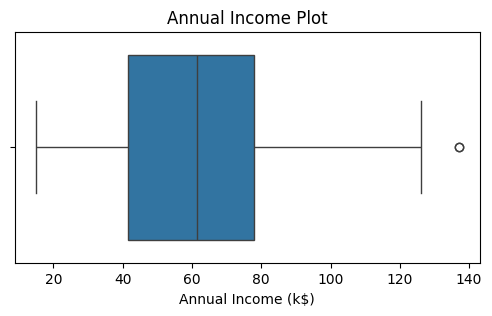

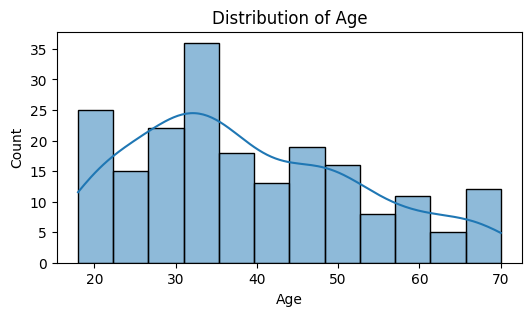

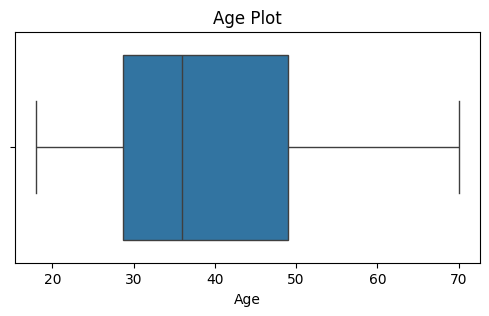

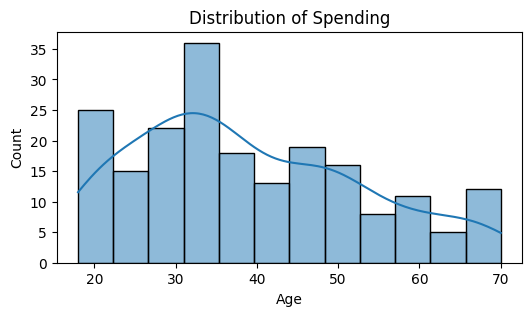

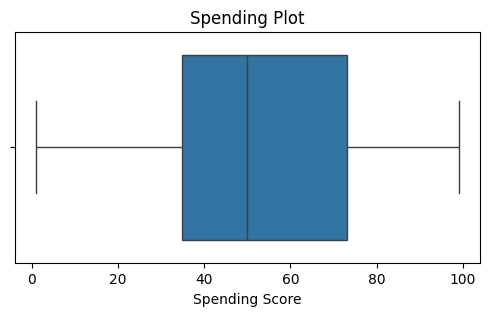

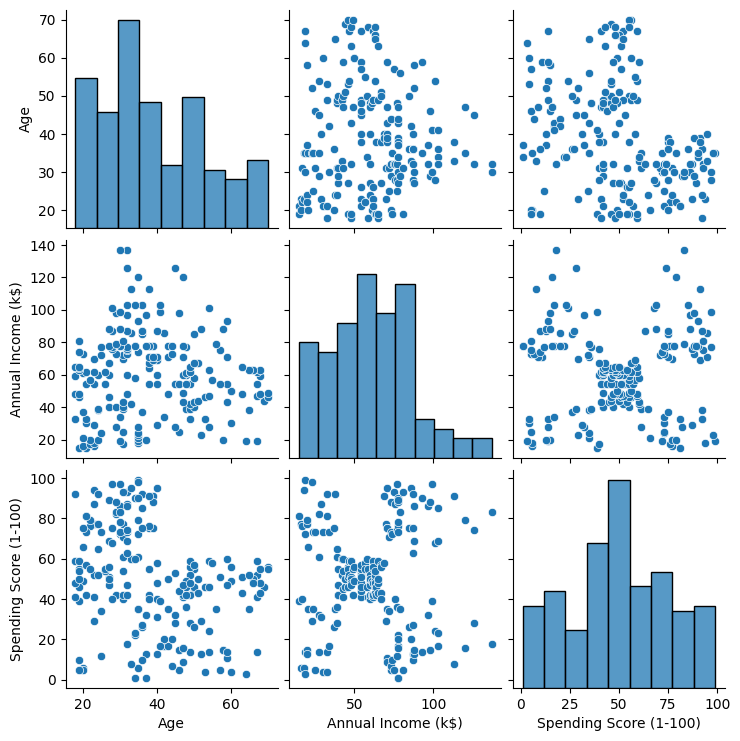

In [ ]:
# Data Validation and EDA Graphs

import seaborn as sb
import matplotlib.pyplot as plt

df.isnull().sum() # No null values 

df.describe() # Summary of the data info

# Histogram and Box Plot(Annual Income)
plt.figure(figsize=(6,3))
sb.histplot(df['Annual Income (k$)'], kde=True, bins=12) # kde: line on top of histogram
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 3))
sb.boxplot(x=df['Annual Income (k$)'])
plt.title('Annual Income Plot')
plt.xlabel('Annual Income (k$)')
plt.show()

# Histogram and Box Plot(Age)
plt.figure(figsize=(6,3))
sb.histplot(df['Age'], kde=True, bins=12) # kde: line on top of histogram
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 3))
sb.boxplot(x=df['Age'])
plt.title('Age Plot')
plt.xlabel('Age')
plt.show()

# Histogram and Box Plot(Spending)
plt.figure(figsize=(6,3))
sb.histplot(df['Age'], kde=True, bins=12) # kde: line on top of histogram
plt.title('Distribution of Spending')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 3))
sb.boxplot(x=df['Spending Score (1-100)'])
plt.title('Spending Plot')
plt.xlabel('Spending Score')
plt.show()

# PairPlot
sb.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()

